# Modelos de Regresión Lineal

## Modelo con datos simulados

* y = a + b * x
* X : 100 valores distribuídos según una N(1.5, 2.5)
* Ye = 5 + 1.9 * x + e
* e estará distribuído según una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 0.3 * x

In [5]:
y_act = 5 + 0.3 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [8]:
data.head()

,x,y_actual,y_prediccion
0,-0.393544,5.195067,4.881937
1,1.597398,5.884378,5.479219
2,2.566911,5.080562,5.770073
3,-0.937294,4.275025,4.718812
4,-2.377825,5.503776,4.286653


In [9]:
import matplotlib.pyplot as plt

In [10]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

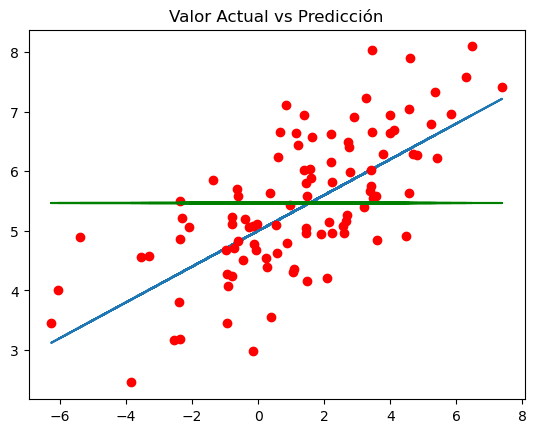

In [11]:
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.title("Valor Actual vs Predicción")

## ¿Como es la predicción de buena?

* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [12]:
y_m = np.mean(y_act)
data["SSR"]=(data["y_prediccion"]-y_m)**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-y_m)**2

In [13]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,-0.393544,5.195067,4.881937,0.341193,0.098051,0.073434
1,1.597398,5.884378,5.479219,0.000173,0.164153,0.174995
2,2.566911,5.080562,5.770073,0.092428,0.475426,0.148604
3,-0.937294,4.275025,4.718812,0.558371,0.196947,1.418550
4,-2.377825,5.503776,4.286653,1.390988,1.481389,0.001423


In [14]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [15]:
SSR

65.57496750094232

In [16]:
SSD

69.21826542561267

In [17]:
SST

133.79791085450992

In [18]:
SSR+SSD

134.793232926555

In [20]:
R2 = SSR/SST
R2

0.49010456951190867

(array([ 2.,  8.,  9., 19., 17., 11., 21.,  5.,  7.,  1.]),
 array([-2.00325489, -1.60535614, -1.20745739, -0.80955863, -0.41165988,
        -0.01376113,  0.38413762,  0.78203638,  1.17993513,  1.57783388,
         1.97573263]),
 <BarContainer object of 10 artists>)

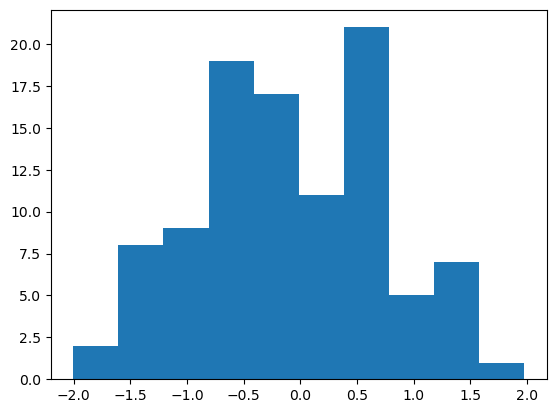

In [21]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo la recta de regresión

* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [22]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.2533775312337168, 5.4660541797762905)

In [23]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [24]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [25]:
alpha = y_mean - beta * x_mean

In [26]:
alpha, beta

(5.088223240916759, 0.3014502250472188)

El modelo lineal obtenido por regresión es: y = 5.088223240916759 + 0.3014502250472188 * x

In [27]:
data["y_model"] = alpha + beta * data["x"]

In [28]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,-0.393544,5.195067,4.881937,0.341193,0.098051,0.073434,0.446294,2.712352,4.969589
1,1.597398,5.884378,5.479219,0.000173,0.164153,0.174995,0.143912,0.118350,5.569759
2,2.566911,5.080562,5.770073,0.092428,0.475426,0.148604,-0.506357,1.725370,5.862019
3,-0.937294,4.275025,4.718812,0.558371,0.196947,1.418550,2.609153,4.799040,4.805676
4,-2.377825,5.503776,4.286653,1.390988,1.481389,0.001423,-0.136975,13.185631,4.371427


In [29]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [30]:
SSR, SSD, SST

(65.39189559772302, 68.40601525678696, 133.79791085450992)

In [31]:
R2 = SSR / SST
R2

0.4887362977500396

Text(0.5, 1.0, 'Valor Actual vs Predicción')

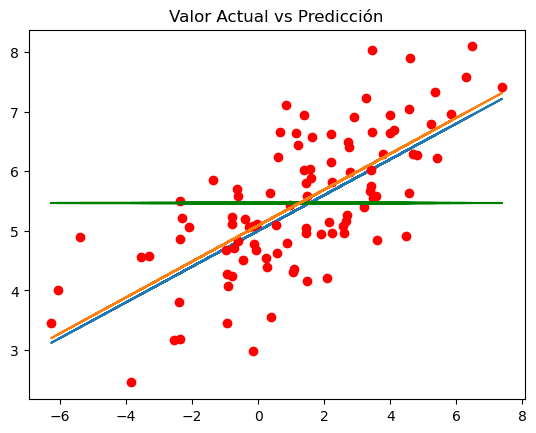

In [32]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE)

In [33]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.8354762497191436

In [34]:
np.mean(data["y_actual"])

5.4660541797762905

In [35]:
RSE / np.mean(data["y_actual"])

0.15284814643994935